## Visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus cases in USA

In [7]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv')


In [8]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-19T10:13:14,67800,3130,57682,30.9756,112.2707
1,NaN,Italy,2020-03-19T17:43:03,41035,3405,4440,41.8719,12.5674
2,NaN,Iran,2020-03-19T11:33:29,18407,1284,5710,32.4279,53.6880
3,NaN,Spain,2020-03-19T20:13:08,17963,830,1107,40.4637,-3.7492
4,NaN,Germany,2020-03-19T20:13:08,15320,44,113,51.1657,10.4515


In [9]:
df.isnull().sum()

Province/State    167
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            3
Longitude           3
dtype: int64

In [10]:
len(df)

328

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  161 non-null    object 
 1   Country/Region  328 non-null    object 
 2   Last Update     328 non-null    object 
 3   Confirmed       328 non-null    int64  
 4   Deaths          328 non-null    int64  
 5   Recovered       328 non-null    int64  
 6   Latitude        325 non-null    float64
 7   Longitude       325 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 20.6+ KB


In [12]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,328.000000,328.000000,328.000000,325.000000,325.000000
mean,737.695122,30.932927,258.798780,24.418423,8.222650
std,4719.306458,268.749480,3210.981796,24.104109,84.396501
min,0.000000,0.000000,0.000000,-71.949900,-175.198200
25%,2.000000,0.000000,0.000000,8.619500,-70.162700
50%,34.500000,0.000000,0.000000,31.054500,11.609400
75%,170.000000,2.000000,3.000000,42.011500,90.433600
max,67800.000000,3405.000000,57682.000000,72.000000,178.065000


In [13]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [14]:
combine_us_data = df[df['Country/Region'] == 'US'].copy().drop(['Country/Region', 'Latitude', 'Longitude'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis=1, numeric_only=True) > 0]

In [15]:
combine_us_data = combine_us_data.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [16]:
combine_us_data = pd.melt(
    combine_us_data,
    id_vars='Province/State',
    value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    value_name='Count',
    var_name='Case'
)

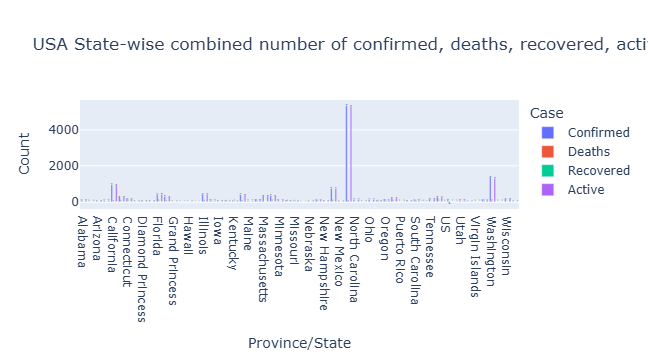

In [17]:
fig = px.bar(
    combine_us_data,
    x='Province/State',
    y='Count',
    text='Count',
    barmode='group',
    color='Case',
    title='USA State-wise combined number of confirmed, deaths, recovered, active COVID-19 cases'
)
fig.show()